# In this file we check different linkage methods for the data provided by Klaudia (10/3/25)

In [2]:


from CollaborationMarch.rearrange_linkage_table import clean_table
from CollaborationMarch.PolishSystem.read_data import get_pRef_from_vectors, get_vectors_file_name, \
    get_fitness_file_name


def get_pRef_for_size_and_column(vector_size: int, fitness_column: int):
    return get_pRef_from_vectors(name_of_vectors_file=get_vectors_file_name(vector_size),
                             name_of_fitness_file=get_fitness_file_name(vector_size),
                             column_in_fitness_file=fitness_column)


import numpy as np
import matplotlib.pyplot as plt
# Display the matrix using a colormap

# def display_table_with_colours(table):
#     # Display the matrix using a colormap
#     plt.imshow(table, cmap='coolwarm', interpolation='nearest')
#     plt.colorbar()  # Add a color scale
#     plt.show()
#     
    


In [15]:
import matplotlib.pyplot as plt

def display_table_with_colours(table):
    plt.imshow(table, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()


def display_rearranged_table_with_colours(table, titles=('Original Table', 'Cleaned Table')):
    cleaned_table = clean_table(table)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Display original table
    axes[0].imshow(table, cmap='coolwarm', interpolation='nearest')
    axes[0].set_title(titles[0])
    axes[0].figure.colorbar(axes[0].images[0], ax=axes[0])

    # Display cleaned table
    axes[1].imshow(cleaned_table, cmap='coolwarm', interpolation='nearest')
    axes[1].set_title(titles[1])
    axes[1].figure.colorbar(axes[1].images[0], ax=axes[1])

    plt.tight_layout()
    plt.show()


In [16]:
from typing import Callable
from Core.PSMetric.Linkage.Atomicity import Atomicity
from Core.PSMetric.Linkage.SobolLinkage import SobolLinkage
from Core.FullSolution import FullSolution
from Core.PSMetric.Linkage.ValueSpecificMutualInformation import FasterSolutionSpecificMutualInformation
from Core.PRef import PRef


def get_local_mutual_information_linkage(pRef: PRef, solution: FullSolution) -> np.ndarray:
    estimated_atomicity_metric = FasterSolutionSpecificMutualInformation()
    estimated_atomicity_metric.set_pRef(pRef)
    estimated_atomicity_metric.set_solution(solution)
    return estimated_atomicity_metric.linkage_table


def get_local_sobol_linkage(pRef: PRef, solution: FullSolution) -> np.ndarray:
    sobol_metric = SobolLinkage()
    sobol_metric.set_pRef(pRef)
    sobol_metric.set_solution(solution)
    return sobol_metric.linkage_table



def show_for_linkage_method(func: Callable, pRef: PRef, solution: FullSolution, name: str):
    linkage_table = func(pRef, solution)
    display_rearranged_table_with_colours(linkage_table, titles = (f"Original table for {name}", "Rearranged"))

In [4]:
pRefs = {f"{vector_size = }, {fitness_column = }": get_pRef_for_size_and_column(vector_size, fitness_column)
         for vector_size in [20, 50, 100]
         for fitness_column in range(3)}


In [7]:
for key, item in pRefs.items():
    print(key, "->\t\t", item)

vector_size = 20, fitness_column = 0 ->		 PRef with 52626 samples, mean = 0.88
vector_size = 20, fitness_column = 1 ->		 PRef with 52626 samples, mean = 0.00
vector_size = 20, fitness_column = 2 ->		 PRef with 52626 samples, mean = 3.53
vector_size = 50, fitness_column = 0 ->		 PRef with 52626 samples, mean = 0.88
vector_size = 50, fitness_column = 1 ->		 PRef with 52626 samples, mean = 0.00
vector_size = 50, fitness_column = 2 ->		 PRef with 52626 samples, mean = 3.53
vector_size = 100, fitness_column = 0 ->		 PRef with 52626 samples, mean = 0.88
vector_size = 100, fitness_column = 1 ->		 PRef with 52626 samples, mean = 0.00
vector_size = 100, fitness_column = 2 ->		 PRef with 52626 samples, mean = 3.53


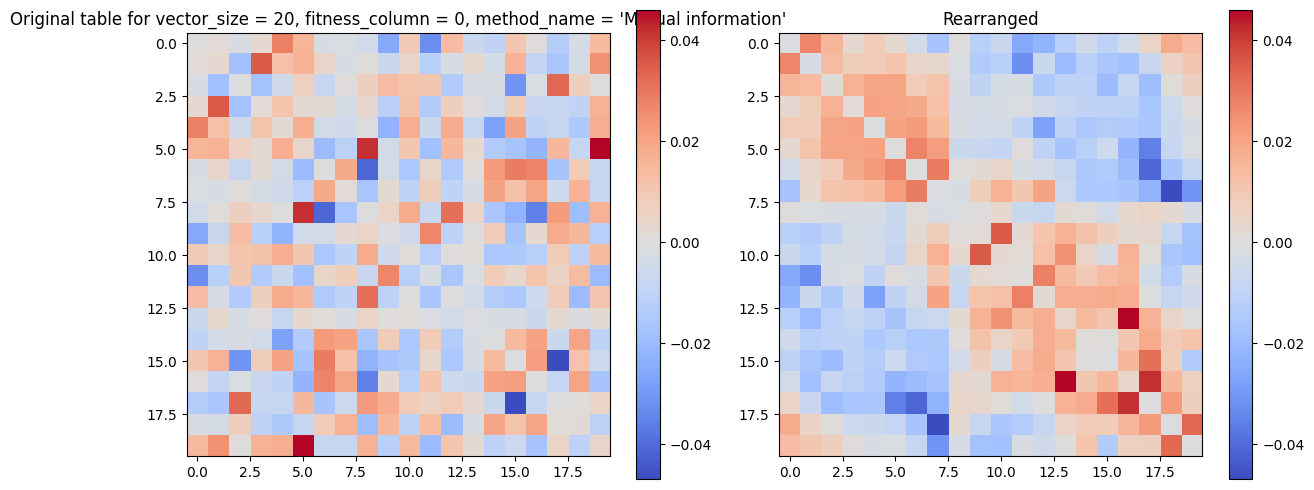

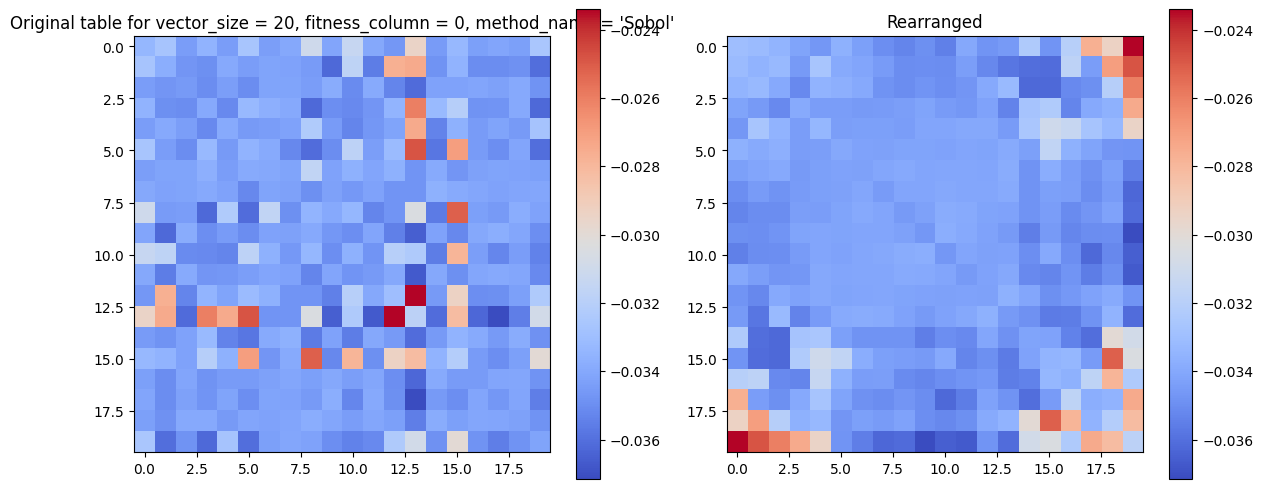

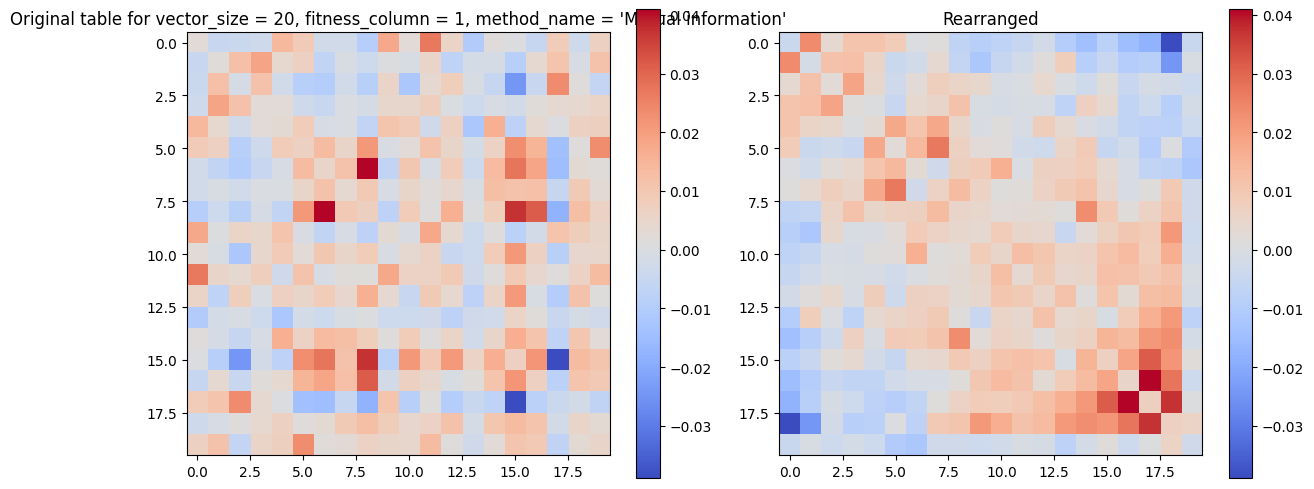

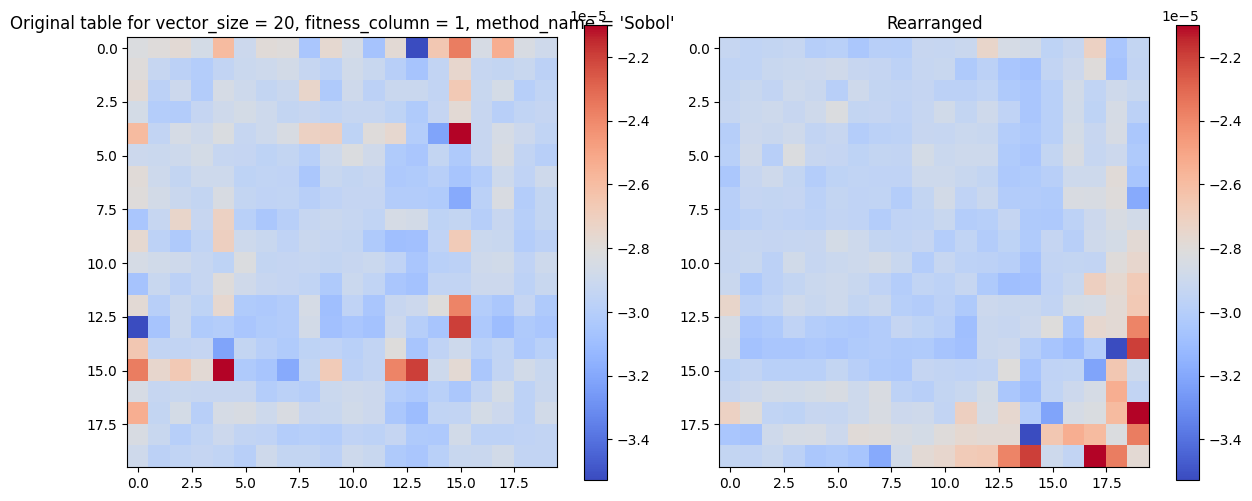

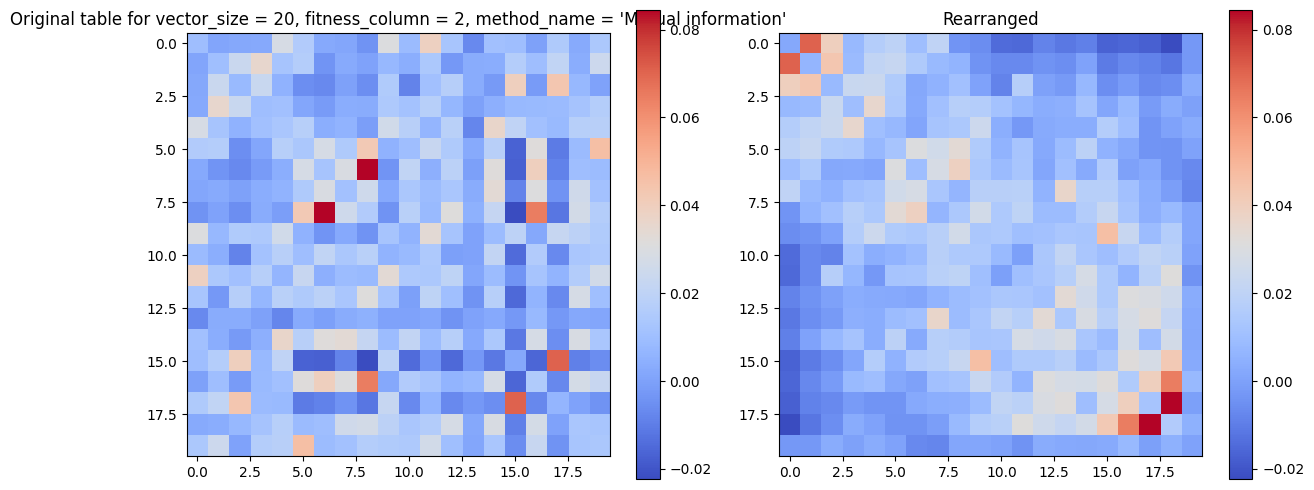

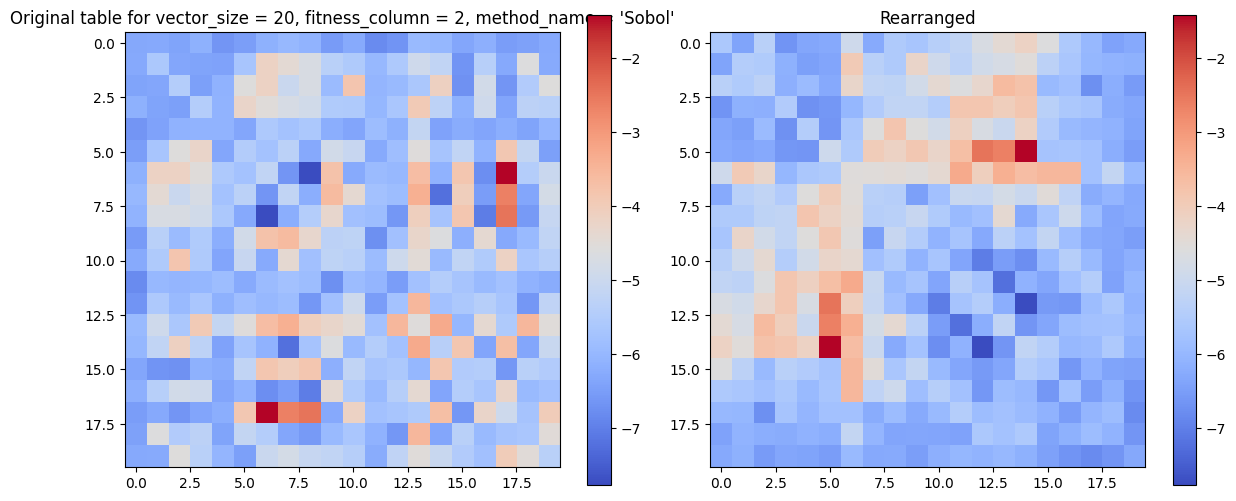

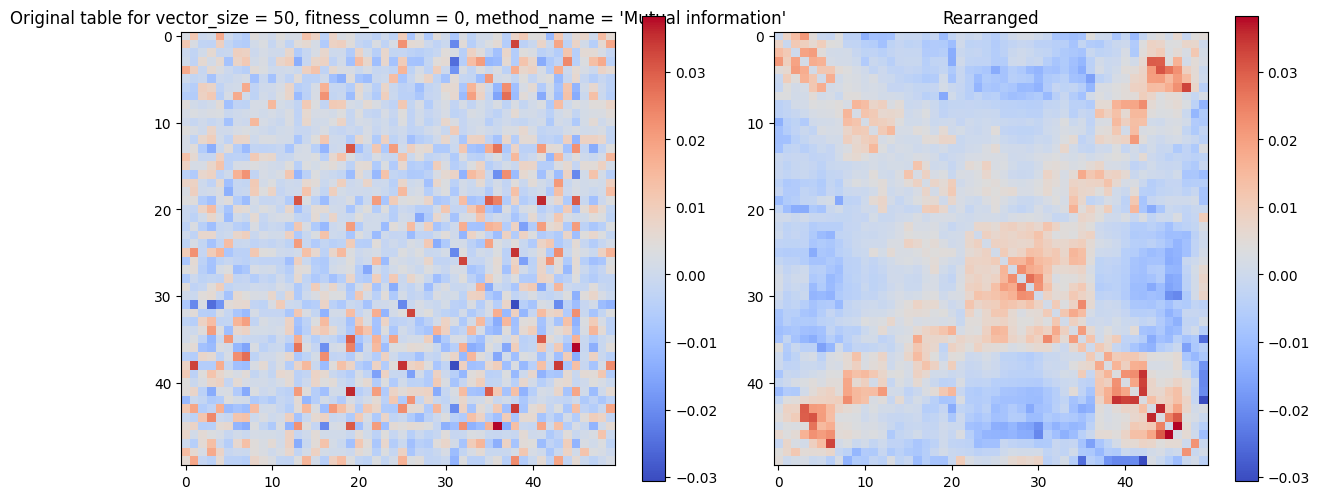

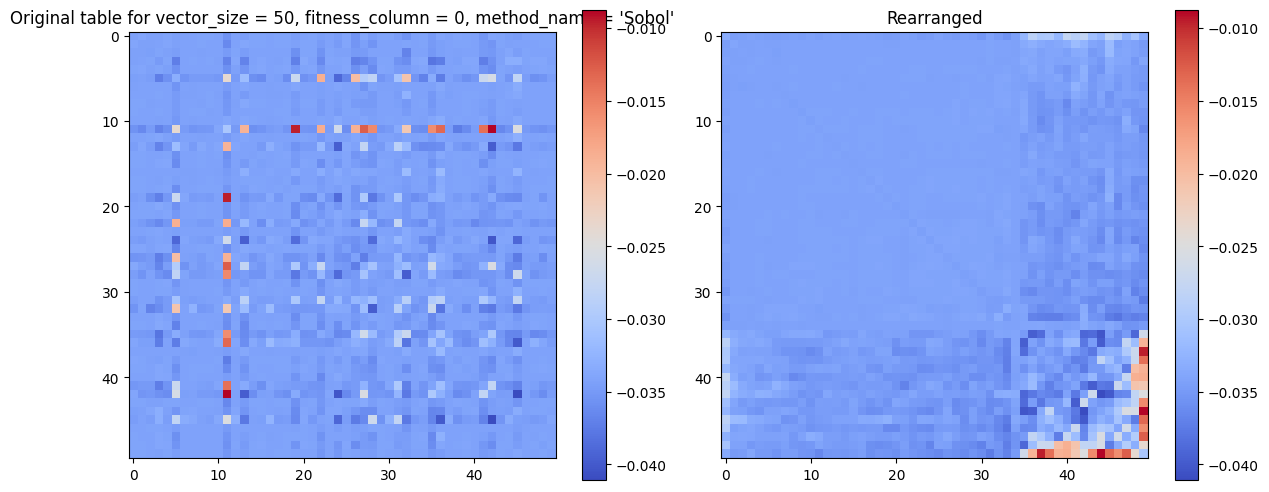

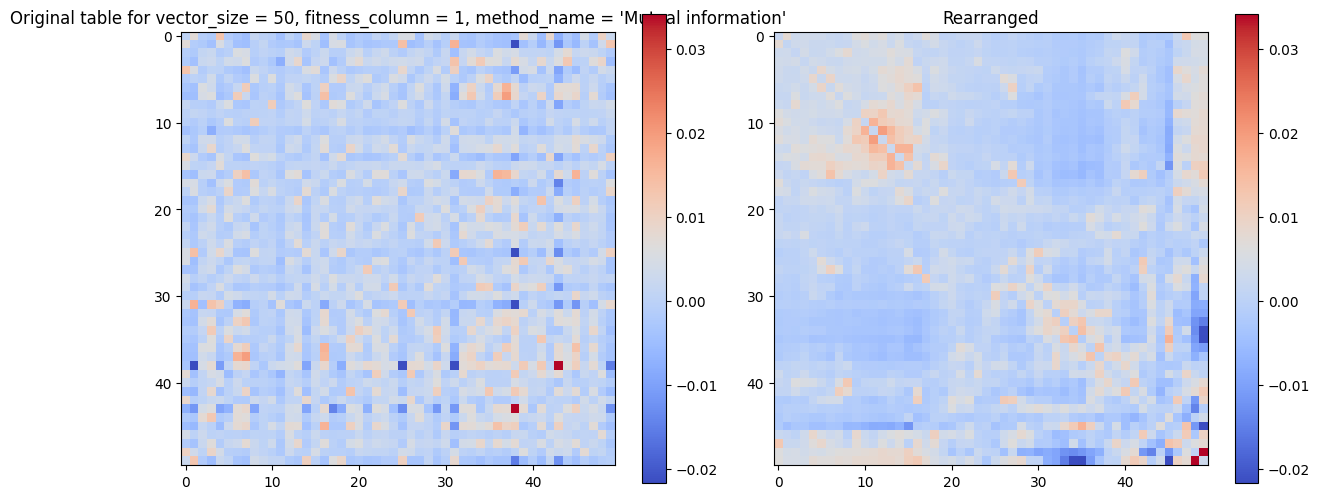

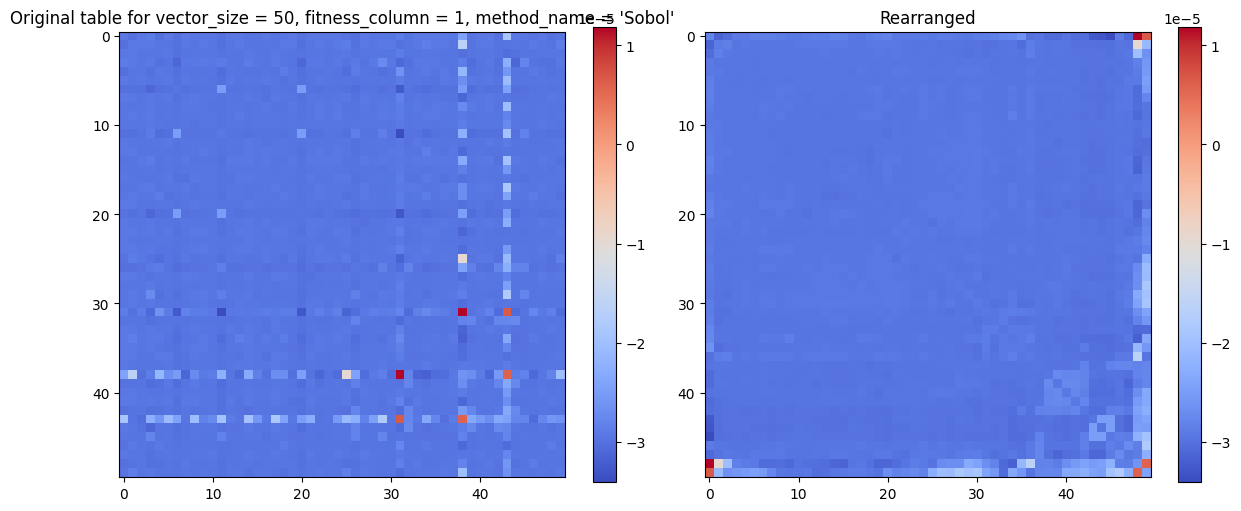

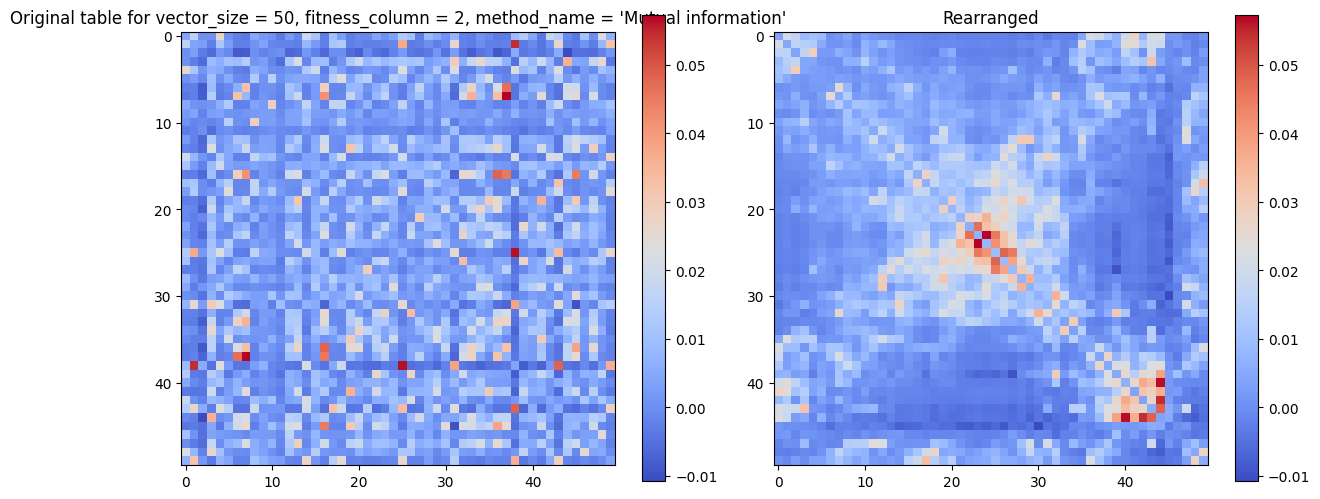

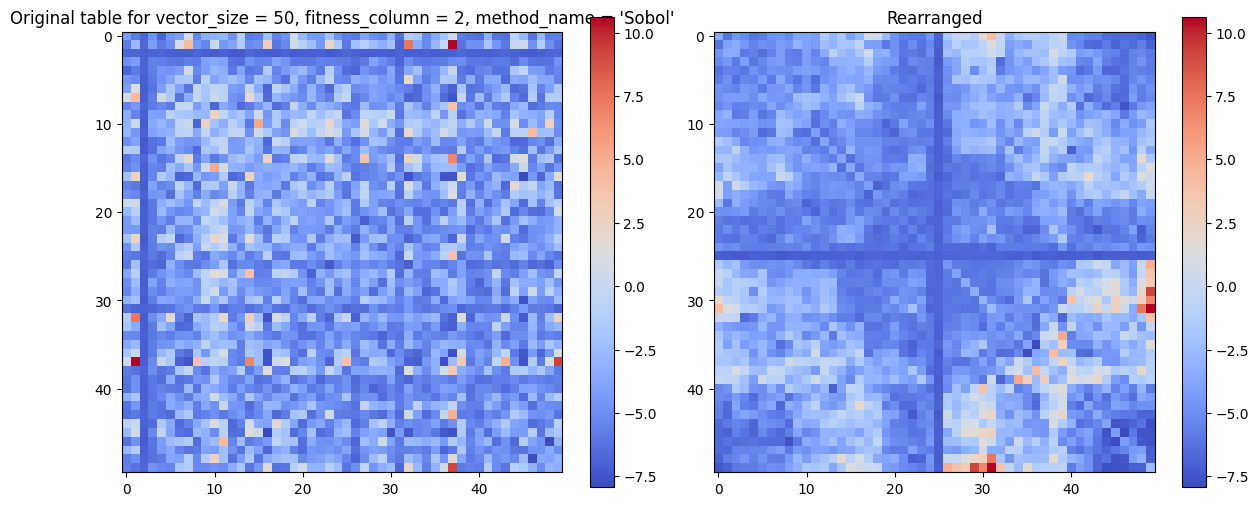

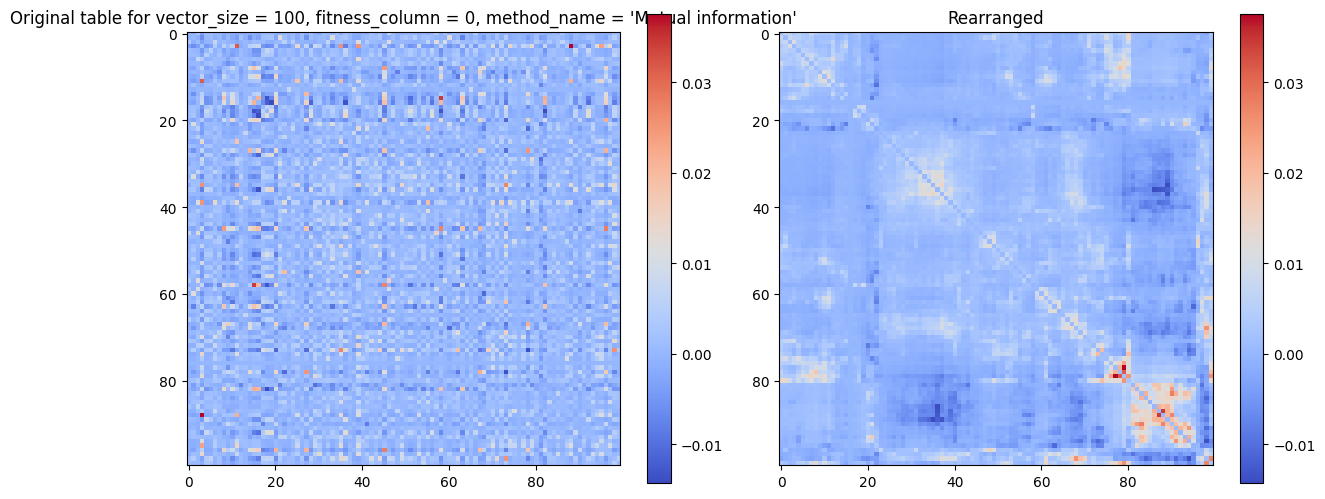

C:\Users\gac8\PycharmProjects\PS-descriptors-LCS\venv\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\gac8\PycharmProjects\PS-descriptors-LCS\venv\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\gac8\PycharmProjects\PS-descriptors-LCS\venv\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


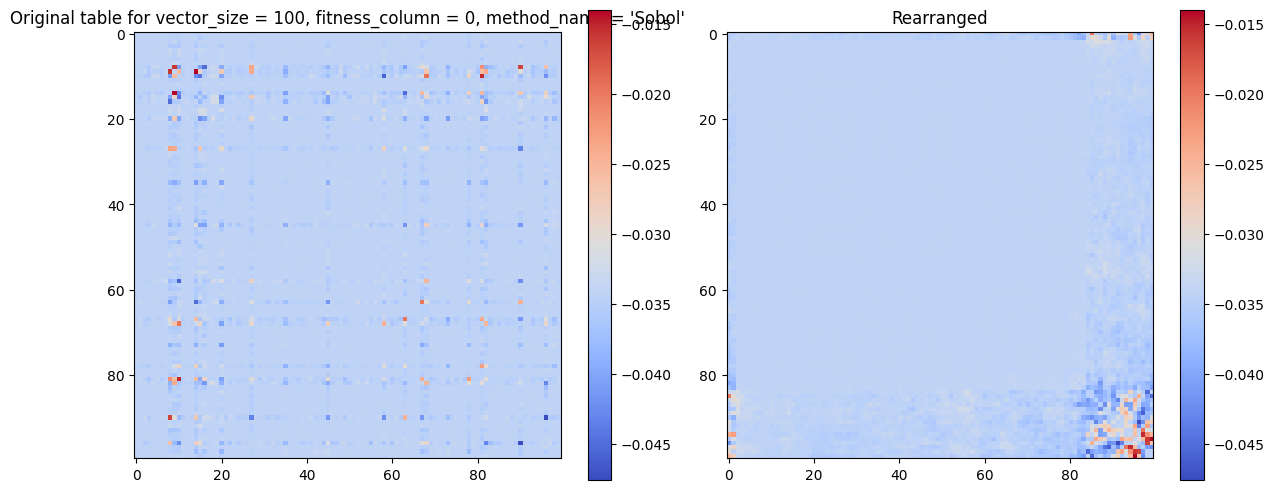

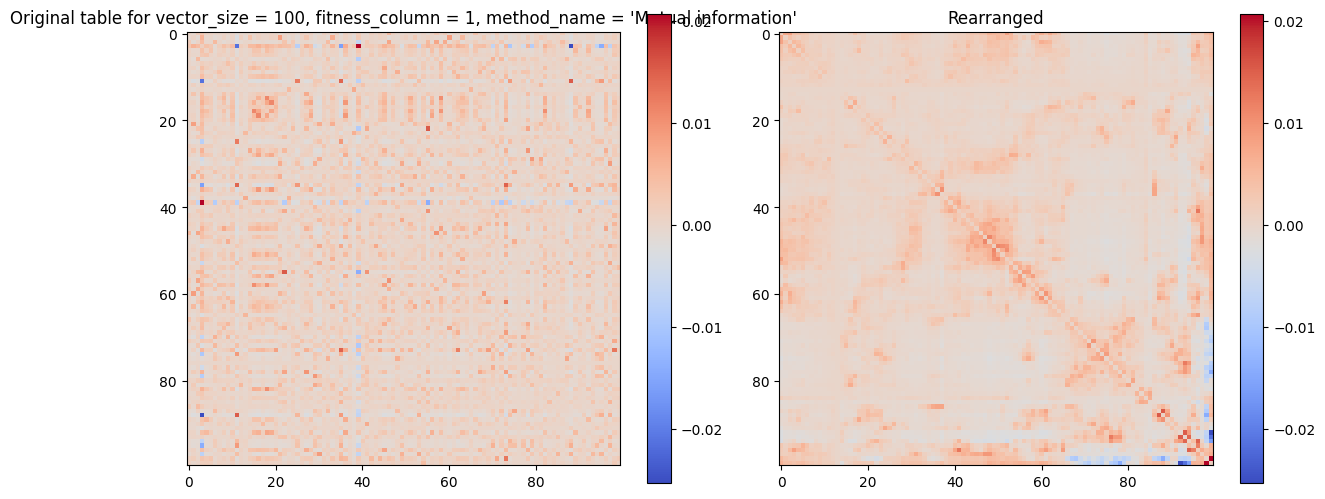

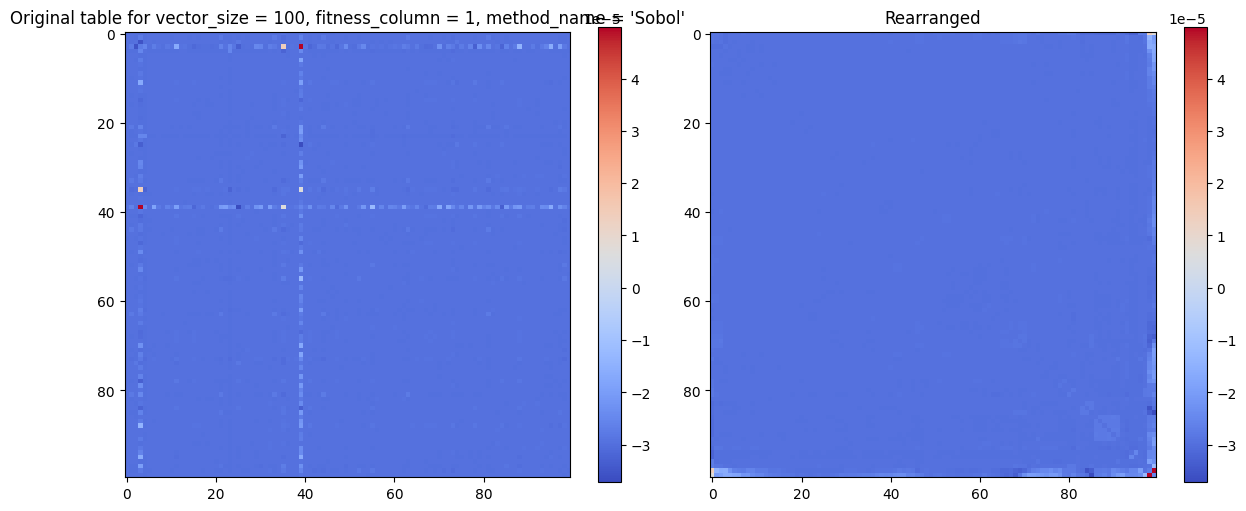

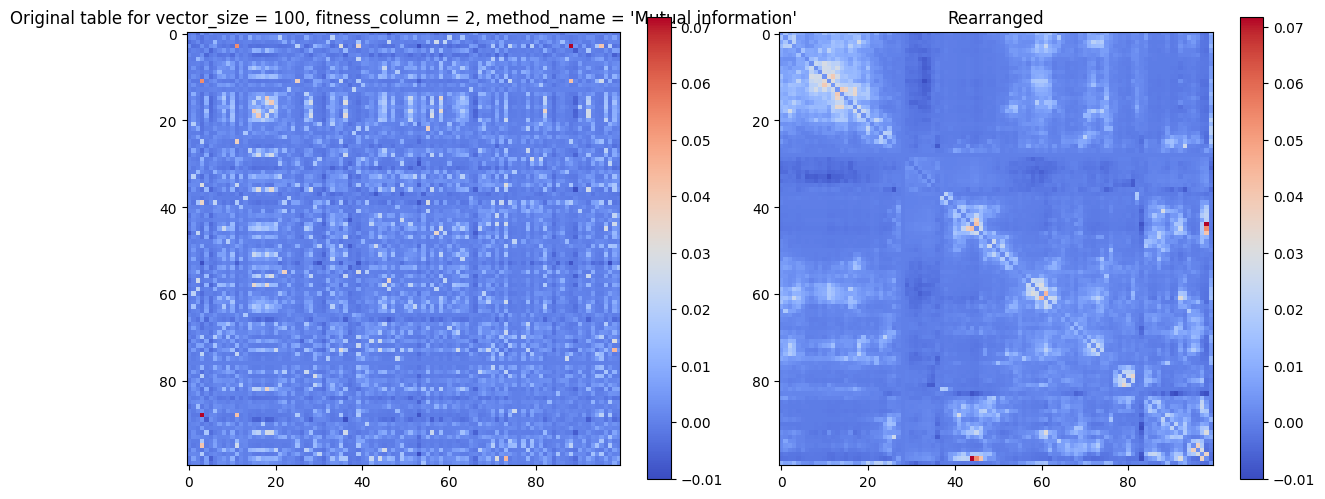

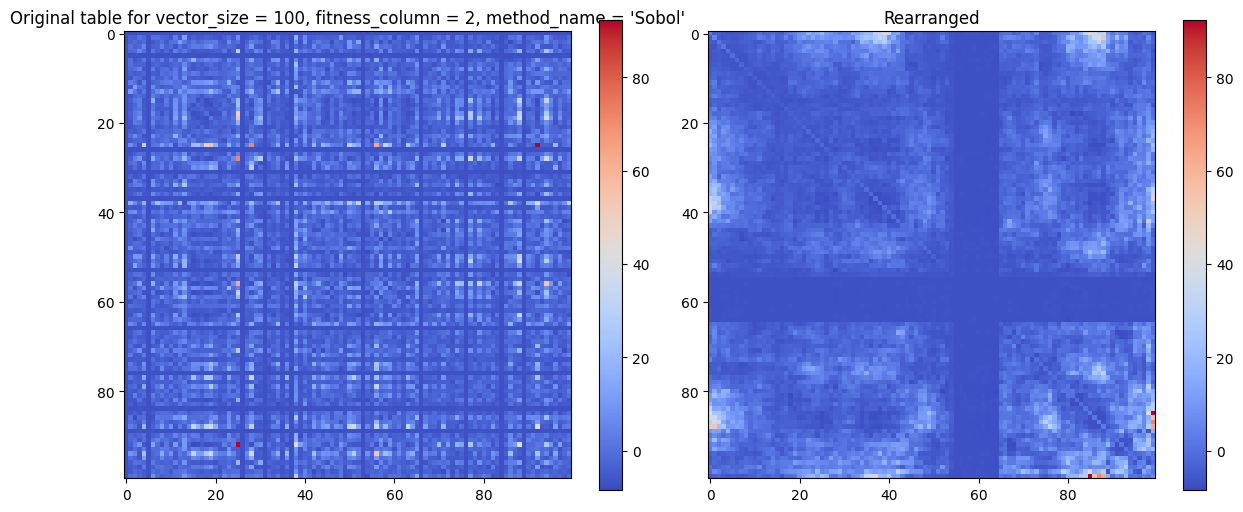

In [18]:
for name, pRef in pRefs.items():
    solution = pRef.get_best_solution()
    for method, method_name in zip([get_local_mutual_information_linkage, get_local_sobol_linkage], ["Mutual information", "Sobol"]):
        show_for_linkage_method(method, pRef, solution, name+f", {method_name = }")